# Hyperparameter tuning & Evaluation

### Import

In [1]:
import sklearn
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import pandas as pd 

In [2]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['curl', 'squat','flessioni','null'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [3]:
label_map = {label:num for num, label in enumerate(actions)}
## necessario per creare la parte del dataset utile
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=42)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [6]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [7]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,132)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

2023-06-22 20:59:54.319614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=800, callbacks=[tb_callback])

Epoch 1/800
3/3 [==============================] - 4s 68ms/step - loss: 1.3947 - categorical_accuracy: 0.3472
Epoch 2/800
3/3 [==============================] - 0s 48ms/step - loss: 1.3558 - categorical_accuracy: 0.2639
Epoch 3/800
3/3 [==============================] - 0s 55ms/step - loss: 1.2506 - categorical_accuracy: 0.2639
Epoch 4/800
3/3 [==============================] - 0s 53ms/step - loss: 1.0792 - categorical_accuracy: 0.4583
Epoch 5/800
3/3 [==============================] - 0s 51ms/step - loss: 0.9800 - categorical_accuracy: 0.5417
Epoch 6/800
3/3 [==============================] - 0s 53ms/step - loss: 0.9986 - categorical_accuracy: 0.5139
Epoch 7/800
3/3 [==============================] - 0s 40ms/step - loss: 0.7825 - categorical_accuracy: 0.5556
Epoch 8/800
3/3 [==============================] - 0s 39ms/step - loss: 0.7028 - categorical_accuracy: 0.6111
Epoch 9/800
3/3 [==============================] - 0s 38ms/step - loss: 11.7143 - categorical_accuracy: 0.5139
Epoch 10/

3/3 [==============================] - 0s 52ms/step - loss: 0.0355 - categorical_accuracy: 1.0000
Epoch 148/800
3/3 [==============================] - 0s 69ms/step - loss: 0.0241 - categorical_accuracy: 1.0000
Epoch 149/800
3/3 [==============================] - 0s 57ms/step - loss: 0.0281 - categorical_accuracy: 0.9861
Epoch 150/800
3/3 [==============================] - 0s 37ms/step - loss: 0.0198 - categorical_accuracy: 1.0000
Epoch 151/800
3/3 [==============================] - 0s 40ms/step - loss: 1.0740 - categorical_accuracy: 0.8472
Epoch 152/800
3/3 [==============================] - 0s 38ms/step - loss: 0.5832 - categorical_accuracy: 0.7639
Epoch 153/800
3/3 [==============================] - 0s 46ms/step - loss: 0.9781 - categorical_accuracy: 0.5694
Epoch 154/800
3/3 [==============================] - 0s 56ms/step - loss: 1.0835 - categorical_accuracy: 0.5139
Epoch 155/800
3/3 [==============================] - 0s 57ms/step - loss: 1.0695 - categorical_accuracy: 0.5139
Epoch 

3/3 [==============================] - 0s 68ms/step - loss: 0.8243 - categorical_accuracy: 0.5278
Epoch 294/800
3/3 [==============================] - 0s 59ms/step - loss: 0.8226 - categorical_accuracy: 0.5278
Epoch 295/800
3/3 [==============================] - 0s 60ms/step - loss: 0.8210 - categorical_accuracy: 0.5278
Epoch 296/800
3/3 [==============================] - 0s 54ms/step - loss: 0.8191 - categorical_accuracy: 0.5278
Epoch 297/800
3/3 [==============================] - 0s 61ms/step - loss: 0.8172 - categorical_accuracy: 0.5278
Epoch 298/800
3/3 [==============================] - 0s 63ms/step - loss: 0.8153 - categorical_accuracy: 0.5278
Epoch 299/800
3/3 [==============================] - 0s 58ms/step - loss: 0.8136 - categorical_accuracy: 0.5278
Epoch 300/800
3/3 [==============================] - 0s 54ms/step - loss: 0.8116 - categorical_accuracy: 0.5417
Epoch 301/800
3/3 [==============================] - 0s 47ms/step - loss: 0.8096 - categorical_accuracy: 0.4861
Epoch 

3/3 [==============================] - 0s 53ms/step - loss: 1.3741 - categorical_accuracy: 0.2639
Epoch 440/800
3/3 [==============================] - 0s 51ms/step - loss: 1.3733 - categorical_accuracy: 0.2639
Epoch 441/800
3/3 [==============================] - 0s 46ms/step - loss: 1.3723 - categorical_accuracy: 0.2639
Epoch 442/800
3/3 [==============================] - 0s 44ms/step - loss: 1.3692 - categorical_accuracy: 0.2639
Epoch 443/800
3/3 [==============================] - 0s 41ms/step - loss: 1.3665 - categorical_accuracy: 0.2639
Epoch 444/800
3/3 [==============================] - 0s 66ms/step - loss: 1.3630 - categorical_accuracy: 0.3056
Epoch 445/800
3/3 [==============================] - 0s 49ms/step - loss: 1.3597 - categorical_accuracy: 0.3472
Epoch 446/800
3/3 [==============================] - 0s 60ms/step - loss: 1.3561 - categorical_accuracy: 0.3333
Epoch 447/800
3/3 [==============================] - 0s 58ms/step - loss: 1.3507 - categorical_accuracy: 0.3472
Epoch 

3/3 [==============================] - 0s 72ms/step - loss: 0.5061 - categorical_accuracy: 0.8056
Epoch 586/800
3/3 [==============================] - 0s 71ms/step - loss: 0.4651 - categorical_accuracy: 0.8750
Epoch 587/800
3/3 [==============================] - 0s 50ms/step - loss: 0.4704 - categorical_accuracy: 0.8472
Epoch 588/800
3/3 [==============================] - 0s 69ms/step - loss: 0.4582 - categorical_accuracy: 0.8333
Epoch 589/800
3/3 [==============================] - 0s 61ms/step - loss: 0.4429 - categorical_accuracy: 0.7917
Epoch 590/800
3/3 [==============================] - 0s 71ms/step - loss: 0.5195 - categorical_accuracy: 0.7917
Epoch 591/800
3/3 [==============================] - 0s 60ms/step - loss: 1.3738 - categorical_accuracy: 0.5000
Epoch 592/800
3/3 [==============================] - 0s 52ms/step - loss: 0.9435 - categorical_accuracy: 0.5972
Epoch 593/800
3/3 [==============================] - 0s 64ms/step - loss: 0.8525 - categorical_accuracy: 0.6528
Epoch 

3/3 [==============================] - 0s 65ms/step - loss: 0.2233 - categorical_accuracy: 0.9306
Epoch 732/800
3/3 [==============================] - 0s 58ms/step - loss: 0.1622 - categorical_accuracy: 0.9444
Epoch 733/800
3/3 [==============================] - 0s 56ms/step - loss: 0.2337 - categorical_accuracy: 0.9167
Epoch 734/800
3/3 [==============================] - 0s 53ms/step - loss: 0.1253 - categorical_accuracy: 0.9722
Epoch 735/800
3/3 [==============================] - 0s 54ms/step - loss: 0.1360 - categorical_accuracy: 0.9444
Epoch 736/800
3/3 [==============================] - 0s 56ms/step - loss: 0.2007 - categorical_accuracy: 0.9306
Epoch 737/800
3/3 [==============================] - 0s 63ms/step - loss: 0.4146 - categorical_accuracy: 0.8472
Epoch 738/800
3/3 [==============================] - 0s 62ms/step - loss: 0.5844 - categorical_accuracy: 0.7778
Epoch 739/800
3/3 [==============================] - 0s 68ms/step - loss: 0.2410 - categorical_accuracy: 0.9167
Epoch 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            50432     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 205,028
Trainable params: 205,028
Non-trai

In [11]:
res = model.predict(X_test)

2/2 [==============================] - 1s 41ms/step


## Hyperparameter tuning

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the model creation function
def create_model(batch_size=32, activation='relu'):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, activation=activation, input_shape=(30, 132)))
    model.add(LSTM(128, return_sequences=True, activation=activation))
    model.add(LSTM(64, return_sequences=False, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(actions.shape[0], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the model
#model = KerasClassifier(build_fn=create_model, verbose=0)

Å# Define the hyperparameters grid
param_grid = {
    'batch_size': [16, 32, 64],
    'activation': ['relu', 'sigmoid'],
    'epochs': [300, 500]
}

# Perform grid search
#grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
#grid_result = grid.fit(X_train, y_train)  # X_train and y_train are your training data

# Print the results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



In [12]:
yhat = model.predict(X_test)

2/2 [==============================] - 0s 36ms/step


In [13]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [14]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
res

array([[7.31632486e-02, 5.35508752e-01, 3.00593935e-02, 3.61268640e-01],
       [8.09078395e-01, 7.62277693e-02, 1.42774999e-03, 1.13266118e-01],
       [9.07364190e-01, 5.47684282e-02, 6.08919014e-04, 3.72585021e-02],
       [6.82737380e-02, 5.12435913e-01, 2.34426726e-02, 3.95847708e-01],
       [9.04342234e-01, 5.49245924e-02, 4.63795877e-04, 4.02694456e-02],
       [1.33618871e-02, 9.97854322e-02, 8.14973116e-01, 7.18795359e-02],
       [1.42629053e-02, 1.16086006e-01, 7.91684628e-01, 7.79664963e-02],
       [7.72039711e-01, 7.84000158e-02, 1.60824740e-03, 1.47952124e-01],
       [4.10148688e-02, 6.67378068e-01, 4.47265431e-02, 2.46880487e-01],
       [3.43445331e-01, 1.60178572e-01, 9.75645334e-03, 4.86619681e-01],
       [8.71196568e-01, 6.36997893e-02, 7.43950426e-04, 6.43597245e-02],
       [1.49252256e-02, 1.15618847e-01, 7.89955676e-01, 7.95002431e-02],
       [9.10206139e-01, 5.34260459e-02, 5.76576509e-04, 3.57912667e-02],
       [3.80751453e-02, 6.89602911e-01, 4.75432500e

In [16]:
len(y_test)

48

The majority of classification metrics are defined for binary cases by default. In extending these binary metrics to multiclass, several averaging techniques are used.

First, a multiclass problem is broken down into a series of binary problems using either One-vs-One (OVO) or One-vs-Rest (OVR, also called One-vs-All) approaches. OVO presents computational drawbacks, so professionals prefer the OVR approach. As I discussed the differences between these two approaches at length in my last article, we will only focus on OVR today.

Essentially, the One-vs-Rest strategy converts a multiclass problem into a series of binary tasks for each class in the target. For example, classifying 4 types of diamond types can be binarized into 4 tasks with OVR:

1. Task 1: ideal vs. [premium, good, fair] — i.e., ideal vs. not ideal
2. Task 2: premium vs. [ideal, good, fair] — i.e., premium vs. not premium
3. Task 3: good vs. [ideal, premium, fair] — i.e., good vs. not good
4. Task 4: fair vs. [ideal, premium, good] — i.e., fair vs. not fair


## Evaluation

### Confusion matrix

2/2 [==============================] - 0s 14ms/step


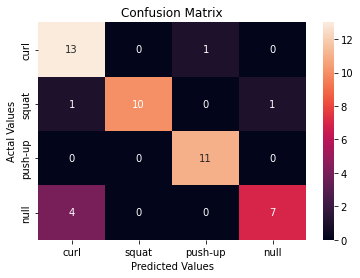

In [36]:
import seaborn as sns
y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test,axis=1).tolist(), np.argmax(y_pred,axis=1).tolist() )
cm_df = pd.DataFrame(cm,
                     index = ['curl', 'squat','push-up','null'], 
                     columns = ['curl', 'squat','push-up','null'])
plt.figure()
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Precision 
answers the question of “what proportion of predicted positives are truly positive?” Of course, you can only answer this question in binary classification. That’s why you ask the question as many times as the number of classes in the target. Each time, you will be asking the question for one class against others.

In [18]:
accuracy_score(ytrue, yhat)

0.8541666666666666

In [28]:
actions = ['curl','squat','push-up','null']

In [31]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1).tolist(), np.argmax(y_pred,axis=1).tolist(), target_names=actions))

              precision    recall  f1-score   support

        curl       0.72      0.93      0.81        14
       squat       1.00      0.83      0.91        12
     push-up       0.92      1.00      0.96        11
         abs       0.88      0.64      0.74        11

    accuracy                           0.85        48
   macro avg       0.88      0.85      0.85        48
weighted avg       0.87      0.85      0.85        48



In [20]:
y_pred_preprod = np.argmax(y_pred,axis=1).tolist()
y_test_preprod = np.argmax(y_test,axis=1).tolist()


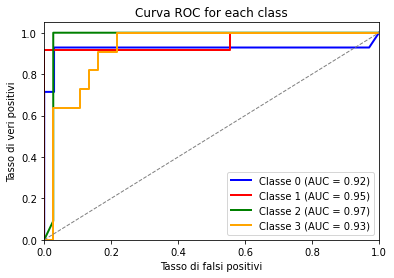

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_test = np.array(y_test_preprod)
y_pred = res
# Calcola la curva ROC per ogni classe
n_classes = y_pred.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Converte la classe i-esima in un problema di classificazione binaria
    y_true = np.where(y_test == i, 1, 0)
    y_scores = y_pred[:, i]
    #print("y_scores",y_scores,"y_true",)

    # Calcola il tasso di falsi positivi e il tasso di veri positivi
    fpr[i], tpr[i], _ = roc_curve(y_true, y_scores,)

    # Calcola l'AUC della curva ROC
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotta la curva ROC per ogni classe
plt.figure()
colors = ['blue', 'red', 'green', 'orange']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Classe %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di falsi positivi')
plt.ylabel('Tasso di veri positivi')
plt.title('Curva ROC for each class')
plt.legend(loc="lower right")
plt.show()


In [23]:
y_score = res

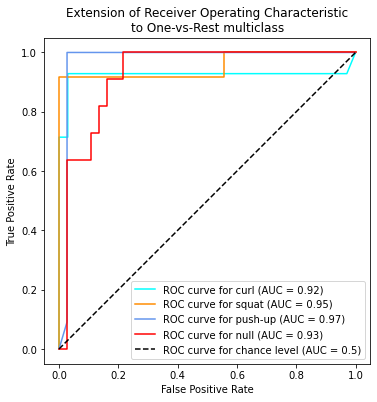

In [37]:
actions = ['curl','squat','push-up','null']
from itertools import cycle
fig, ax = plt.subplots(figsize=(6, 6))
colors = cycle(["aqua", "darkorange", "cornflowerblue","red"])
for class_id, color in zip(range(4), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {actions[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

In [26]:
type(y_pred_preprod)

list